<img src="JFM-notebooks-logo.jpg" style="max-width:100%" />

In [3]:
import sys, os
os.environ['NOWARNINGS'] = '1'
sys.path.append(os.path.join('Code'))
from load_data import load_data
from postprocessing.plotting import *
plotting_defaults()
plt.rcParams['figure.dpi'] = 150 # to adjust display size in notebook
ref, refsim, transient, varsim_list = load_data('Data', include_ensemble=False)
textwidth = 5.31445

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from postprocessing.plotting import *

### Generate figure

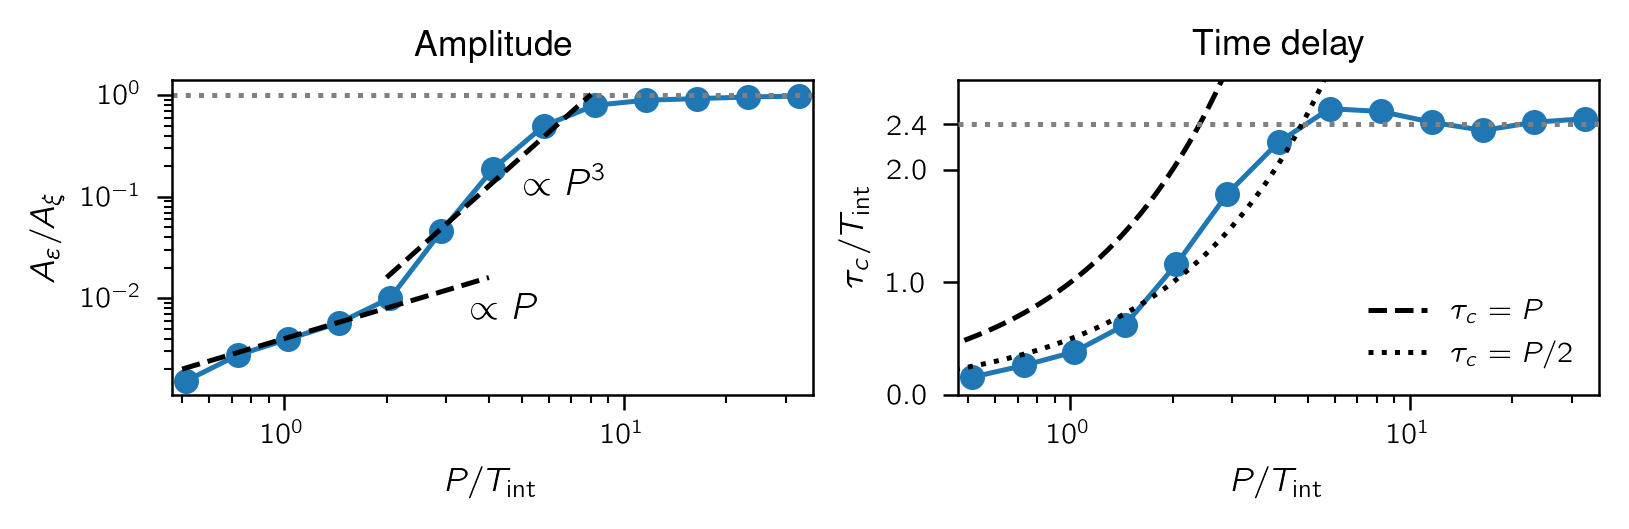

In [5]:
fig, (ax_amp, ax_time) = plt.subplots(1, 2, figsize=(textwidth, 0.31*textwidth))

# gather period times, cascade times and amplitudes
periods = np.zeros(len(varsim_list))
cascade_times = np.zeros(len(varsim_list))
amplitudes = np.zeros(len(varsim_list))
for vkey, varsim in enumerate(varsim_list):
    periods[vkey] = varsim.get_period()
    cascade_times[vkey], amplitudes[vkey] = varsim.cascade_time(transient)

## amplitude plot
plt.sca(ax_amp)
ax_amp.set_title('Amplitude')
plt.plot(periods/ref.Tint, amplitudes, marker='o')
plt.axhline(1, color='grey', ls=':')

# scaling lines
x = np.geomspace(5e-1, 4e0, 200)
plt.plot(x, 4e-3*x, color='black', ls='--')
x = np.geomspace(2e0, 8e0, 200)
plt.plot(x, 2e-3*x**3, color='black', ls='--')
plt.text(3.5, 6e-3, r'$\propto P$')
plt.text(5, 1e-1, r'$\propto P^3$')

# range and labels
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$P/T_\mathrm{int}$')
plt.ylabel(r'$A_\varepsilon/A_\xi$')
plt.xlim(np.amin(periods/ref.Tint)/1.1, np.amax(periods/ref.Tint)*1.1)

## cascade time plot
plt.sca(ax_time)
ax_time.set_title('Time delay')
plt.plot(periods/ref.Tint, cascade_times/ref.Tint, marker='o')

# guides
x = np.geomspace(1e-1, 1e1, 200)*ref.Tint
plt.plot(x/ref.Tint, x/ref.Tint, color='black', ls='--',
           label=r'$\tau_c = P$')
plt.plot(x/ref.Tint, x/ref.Tint/2, color='black', ls=':',
           label=r'$\tau_c = P/2$')

# large-period-time limit
limit_cascade_time = np.mean(cascade_times[-4:])
ct_rounded_nondim = np.round(limit_cascade_time/ref.Tint, 1)
plt.axhline(ct_rounded_nondim, color='grey', ls=':', zorder=10)
plt.yticks([0,1,2,ct_rounded_nondim])

# range and labels
plt.xscale('log')
plt.xlabel(r'$P/T_\mathrm{int}$')
plt.ylabel(r'$\tau_c/T_\mathrm{int}$')
plt.xlim(np.amin(periods/ref.Tint)/1.1, np.amax(periods/ref.Tint)*1.1)
plt.ylim(0, np.amax(cascade_times/ref.Tint)*1.1)
plt.legend(loc='lower right', frameon=False);